In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [18]:
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [12]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [13]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [14]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

least square method finds the coefficients that best fit the data. One more condition to be added is that it also finds the unbiased coefficients. Here unbiased means that OLS doesn’t consider which independent variable is more important than others. 

“Is a model with the lowest RSS truly the best model?” NO!

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


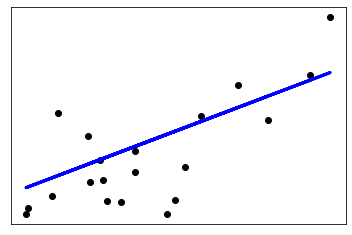

In [15]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black') #plot using the testing set
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3) #line using the prediction

plt.xticks(())
plt.yticks(())

plt.show()

In [22]:
# dataframe and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# dataset
from sklearn.datasets import load_boston
# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, Ridge
from sklearn.linear_model import LinearRegression, Ridge
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
# load dataset
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target

# standardize and train/test split
house_price.data = preprocessing.scale(house_price.data)
X_train, X_test, y_train, y_test = train_test_split(
    house_price.data, house_price.target, test_size=0.3, random_state=10)

In [32]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
ols_pred = regr.predict(X_test)

In [28]:
# initialize
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

# iterate lambdas
for alpha in np.arange(0, 200, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))

# organize dataframe
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()

In [34]:
ridge_df.head()

variable,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,estimate,-1.321404,1.514832,-0.166266,0.411579,-1.771168,2.352821,0.318499,-3.256645,2.632576,-2.059466,-1.755201,1.181143,-3.887043
1,estimate0,-1.321404,1.514832,-0.166266,0.411579,-1.771168,2.352821,0.318499,-3.256645,2.632576,-2.059466,-1.755201,1.181143,-3.887043
2,estimate1,-1.305844,1.491704,-0.186300,0.416554,-1.734866,2.368304,0.305241,-3.213459,2.540705,-1.976631,-1.746362,1.179751,-3.867286
3,estimate2,-1.291053,1.469716,-0.204508,0.421192,-1.700188,2.382762,0.292616,-3.171513,2.455276,-1.900395,-1.737941,1.178322,-3.847925
4,estimate3,-1.276962,1.448771,-0.221104,0.425531,-1.667018,2.396278,0.280573,-3.130750,2.375608,-1.830033,-1.729900,1.176856,-3.828944


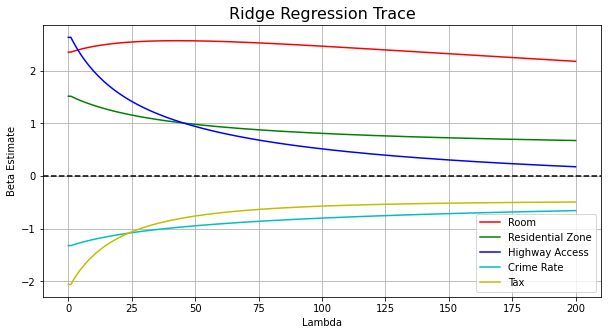

In [29]:
# plot betas by lambda
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)

Through the demonstration, we confirmed that there is no equation for finding the best lambda. Thus, we needed to iterate a series of values and evaluate prediction performances with MSE. By doing so, we found that the ridge regression model performs better than the plain linear regression model for prediction.
OLS simply finds the best fit for given data
Features have different contributions to RSS
Ridge regression gives a bias to important features
MSE or R-square can be used to find the best lambd

Text(0, 0.5, 'MSE')

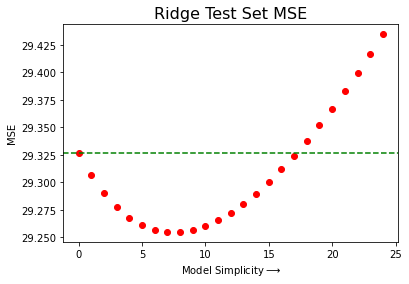

In [33]:
# MSE of Ridge and OLS
ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]
ols_mse = mean_squared_error(y_test, ols_pred)

# plot mse
plt.plot(ridge_mse_test[:25], 'ro')
plt.axhline(y=ols_mse, color='g', linestyle='--')
plt.title("Ridge Test Set MSE", fontsize=16)
plt.xlabel("Model Simplicity$\longrightarrow$")
plt.ylabel("MSE")